# Titanic dataset

Predicting chances of surviving on titanic using logistic regression.

In [1]:
import numpy as np

import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

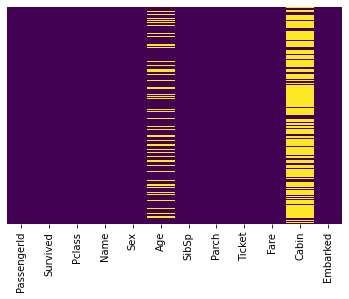

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

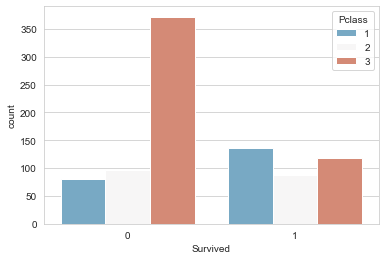

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='RdBu_r')

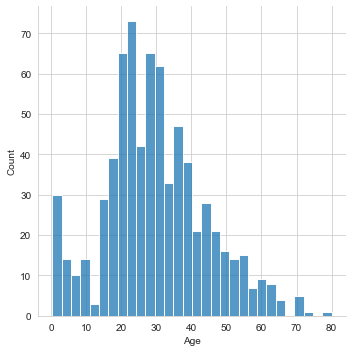

In [10]:
sns.displot(train['Age'].dropna(), bins=30)

<AxesSubplot:ylabel='Frequency'>

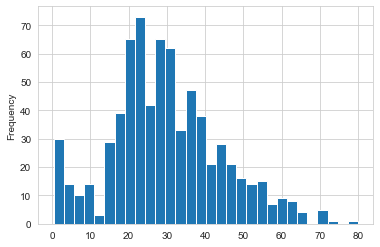

In [11]:
train['Age'].plot.hist(bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

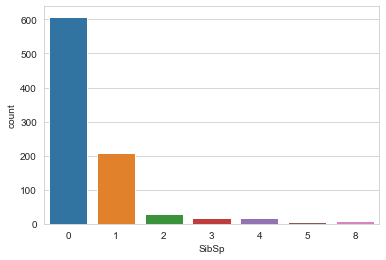

In [13]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

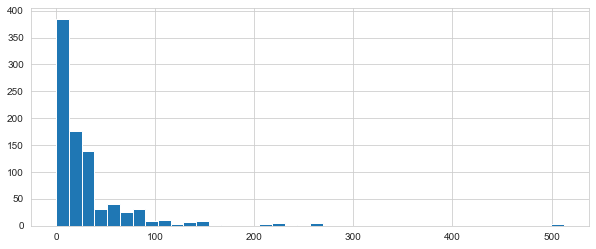

In [14]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [15]:
import cufflinks as  cf

In [16]:
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

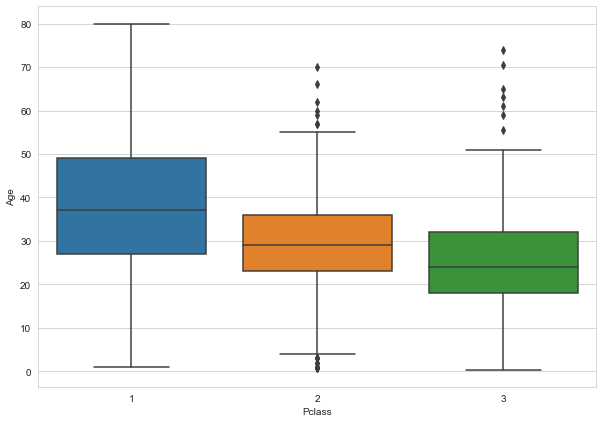

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
            
#train['Age'][train['Pclass'] == 1].mean()

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

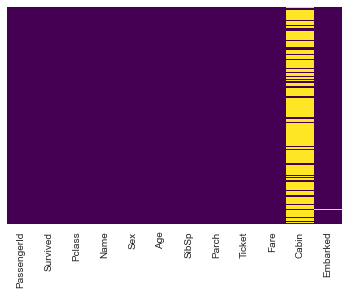

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
train[['Age', 'Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,24.0,3
889,26.0,1


In [23]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

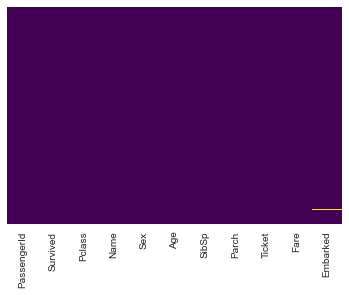

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
train.dropna(inplace=True)

<AxesSubplot:>

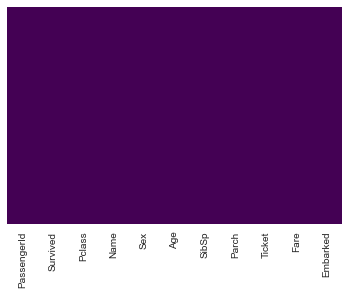

In [27]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [28]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [29]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [32]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
train = pd.concat([train, sex, embark], axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [35]:
train.drop(['Embarked', 'Sex', 'Name', 'Ticket'], axis=1, inplace=True )

In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
train.drop('PassengerId', axis=1, inplace=True)

In [38]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
pd.get_dummies(train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [40]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression(max_iter=200)

In [45]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)